In [2]:

#imports
from sqlalchemy import create_engine
from datetime import timedelta, datetime, tzinfo
from zipfile import ZipFile
import collections
import pandas as pd

In [3]:
#read in csvs
states_df = pd.read_csv("all-states-history.csv")

national_df = pd.read_csv("national-history.csv")

In [4]:
states_df.head(10)

,date,state,death,deathConfirmed,deathIncrease,hospitalized,hospitalizedCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
0,3/7/21,AK,305.0,NaN,0,1293.0,33.0,56886.0,0,NaN,1731628.0,0
1,3/7/21,AL,10148.0,7963.0,-1,45976.0,494.0,499819.0,408,295690.0,2323788.0,2347
2,3/7/21,AR,5319.0,4308.0,22,14926.0,335.0,324818.0,165,315517.0,2736442.0,3380
3,3/7/21,AS,0.0,NaN,0,NaN,NaN,0.0,0,NaN,2140.0,0
4,3/7/21,AZ,16328.0,14403.0,5,57907.0,963.0,826454.0,1335,NaN,7908105.0,45110
5,3/7/21,CA,54124.0,NaN,258,NaN,4291.0,3501394.0,3816,NaN,49646014.0,133186
6,3/7/21,CO,5989.0,5251.0,3,23904.0,326.0,436602.0,840,NaN,6415123.0,38163
7,3/7/21,CT,7704.0,6327.0,0,12257.0,428.0,285330.0,0,NaN,6520366.0,0
8,3/7/21,DC,1030.0,NaN,0,NaN,150.0,41419.0,146,29570.0,1261363.0,5726
9,3/7/21,DE,1473.0,1337.0,9,NaN,104.0,88354.0,215,NaN,1431942.0,5867


In [5]:
national_df.head()

,date,death,deathIncrease,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,positive,positiveIncrease,totalTestResults,totalTestResultsIncrease
0,3/7/21,515148.0,839,726,40212.0,878613.0,74582825.0,131835,28756184.0,41530,363824818,1169754
1,3/6/21,514309.0,1680,503,41401.0,877887.0,74450990.0,143835,28714654.0,60015,362655064,1430992
2,3/5/21,512629.0,2221,2781,42541.0,877384.0,74307155.0,271917,28654639.0,68787,361224072,1744417
3,3/4/21,510408.0,1743,1530,44172.0,874603.0,74035238.0,177957,28585852.0,65487,359479655,1590984
4,3/3/21,508665.0,2449,2172,45462.0,873073.0,73857281.0,267001,28520365.0,66836,357888671,1406795


KeyError: 'date'

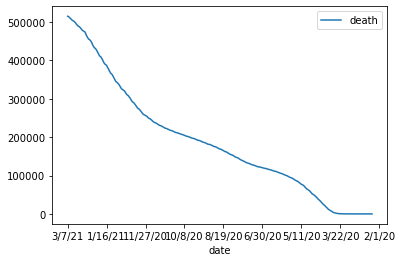

In [6]:
death = national_df.plot.line(x='date', y='death')

#we can loc for the past 3 months
date_df = national_df.set_index("date")
date_df.sort_values(by=['date'], inplace=True, ascending=False)
monthtrend_df = date_df.loc['01/01/21':'3/7/21']

trend=monthtrend_df.plot.line(x='date', y='death')


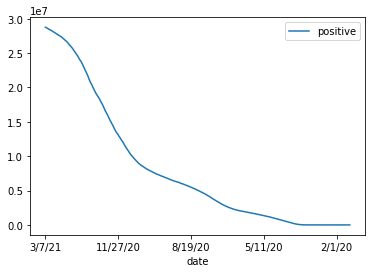

In [7]:
positive=national_df.plot.line(x='date', y='positive')

In [8]:
connection_string = "postgres:November16th%@localhost:5432/Covid"
engine = create_engine(f'postgresql://{connection_string}')

In [9]:
engine.table_names()

OperationalError: (psycopg2.OperationalError) FATAL:  password authentication failed for user "postgres"

(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [33]:
michigan_df = states_df.loc[states_df['state'] == "MI", :]

michigan_df

,date,state,death,deathConfirmed,deathIncrease,hospitalized,hospitalizedCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
24,3/7/21,MI,16658.0,15666.0,0,NaN,866.0,656072.0,0,549881.0,10621967.0,0
80,3/6/21,MI,16658.0,15666.0,57,NaN,866.0,656072.0,1692,549881.0,10621967.0,37232
136,3/5/21,MI,16601.0,15610.0,12,NaN,866.0,654380.0,1791,541258.0,10584735.0,46112
192,3/4/21,MI,16589.0,15600.0,39,NaN,890.0,652589.0,1827,541258.0,10538623.0,46486
248,3/3/21,MI,16550.0,15563.0,6,NaN,882.0,650762.0,1705,541258.0,10492137.0,36453
...,...,...,...,...,...,...,...,...,...,...,...,...
20503,3/5/20,MI,NaN,0.0,0,NaN,NaN,100.0,26,NaN,NaN,0
20533,3/4/20,MI,NaN,0.0,0,NaN,NaN,74.0,24,NaN,NaN,0
20553,3/3/20,MI,NaN,NaN,0,NaN,NaN,50.0,23,NaN,NaN,0
20569,3/2/20,MI,NaN,NaN,0,NaN,NaN,27.0,13,NaN,NaN,0


In [34]:
michigan_df.to_csv("michigan-data.csv")